In [1]:
!jupyter labextension install jupyterlab-plotly@5.2.1 @jupyter-widgets/jupyterlab-manager

Building jupyterlab assets (build:prod:minimize)


In [2]:
!pip install plotly

In [3]:
import requests
import pandas as pd
import json
from pandas import DataFrame
import plotly.express as px
import numpy as np

In [4]:
# On crée un dataset avec les colonnes qu'on veut dans le DF final que l'on utilisera pour la viz.
# == Groupements de toutes les informations précédement récupérées. 

df_top_cities_hotels = pd.DataFrame(columns = ["cityid", "hotel_id","cityName", "hotelName", "latitude_hotel", "longitude_hotel", "URL", "score", "description"])
df_top_cities_hotels


,cityid,hotel_id,cityName,hotelName,latitude_hotel,longitude_hotel,URL,score,description


In [5]:
# On crée un dataset avec les 3 villes principales
exportDfVilles_averagetemp = pd.read_csv('exportDfVilles' ,nrows=3)
exportDfVilles_averagetemp.rename( columns={'Unnamed: 0':'cityid'}, inplace=True)
exportDfVilles_averagetemp

,cityid,Villes,NomComplet,Latitude_Ville,Longitude_Ville,averageTemp
0,22,Avignon,"Avignon, Vaucluse, Provence-Alpes-Côte d'Azur,...",43.949249,4.805901,27.23125
1,24,Nimes,"Nîmes, Gard, Occitanie, France métropolitaine,...",43.837425,4.360069,26.60875
2,23,Uzes,"Uzès, Nîmes, Gard, Occitanie, France métropoli...",44.012128,4.419672,26.43125


In [6]:
for city in exportDfVilles_averagetemp['Villes']:
    
    # On loop sur la colonne ville du df
    city_name = city
    city_id = exportDfVilles_averagetemp.loc[exportDfVilles_averagetemp["Villes"] == city,"cityid"].values[0]    

    # On va chercher le JSON susnommé
    path = "results/" + city_name +'_hotel_booking.json'
    temp = pd.read_json(str(path))
    temp = temp.reset_index().rename({'index': 'hotel_id'}, axis = 1)
    temp.loc[:, "cityid"] = city_id
    
    #temp.loc[:, "Villes"] = city_name
    #temp.loc[:, "city_id"] = city_id

    # On clean les données qui contiennent le ""\n"
    temp['description'] = temp['description'].apply(lambda x : x.replace('\n',''))
    temp['hotelName'] = temp['hotelName'].apply(lambda x : x.replace('\n',''))

    # On modifie les decimales
    temp['score'] = temp['score'].str.replace(',','.')

    # On sépare la latitude de la longitude dans la coordonnée GPS en une liste de deux.
    temp.loc[:, "lat&lon_hotel"] = temp["lat&lon_hotel"].str.split(',')

    # On sélectionne la première colonne de la liste pour en faire une colonne latitude à part entière dans le DF.
    temp.loc[:, "latitude_hotel"] = temp["lat&lon_hotel"].apply(lambda x : x[1])

    # Idem pour la latitude.
    temp.loc[:, "longitude_hotel"] = temp["lat&lon_hotel"].apply(lambda x : x[0])

    temp = temp.drop('lat&lon_hotel', axis = 1)

    df_top_cities_hotels = df_top_cities_hotels.append(temp)
    
    # On doit supprimer les lignes avec un nan dans la colonne score pour que la visualization fonctionne
    df_top_cities_hotels = df_top_cities_hotels.dropna(subset=['score'])

df_top_cities_hotels

,cityid,hotel_id,cityName,hotelName,latitude_hotel,longitude_hotel,URL,score,description
0,22,0,Avignon,Autour Du Petit Paradis,43.9462327337098,4.81007046997547,https://www.booking.com\n/hotel/fr/autour-du-p...,8.3,"Situé au cœur d'Avignon, l'établissement Autou..."
1,22,1,Avignon,Aux Augustins,43.9500576272619,4.8132187128067,https://www.booking.com\n/hotel/fr/aux-augusti...,8.7,"Situé dans le centre historique d'Avignon, l'é..."
2,22,2,Avignon,A l'ombre du Palais,43.951729,4.810339,https://www.booking.com\n/hotel/fr/a-l-39-ombr...,8.4,Situé à 500 mètres du palais des Papes et à 10...
3,22,3,Avignon,Hôtel Le Bristol,43.9440321278147,4.80533167719841,https://www.booking.com\n/hotel/fr/hotel-brist...,8.1,Idéalement situé à l’intérieur des remparts du...
4,22,4,Avignon,hotelF1 Avignon Centre Courtine gare TGV,43.929032,4.788189,https://www.booking.com\n/hotel/fr/hotelf1-avi...,6.8,L'hotelF1 Avignon Centre Courtine gare TGV se ...
...,...,...,...,...,...,...,...,...,...
83,23,83,Uzes,Calme et Charmant Studio à deux pas du centre ...,44.00968,4.4163925,https://www.booking.com\n/hotel/fr/calme-et-ch...,9.0,Doté d'une connexion Wi-Fi gratuite et offrant...
85,23,85,Uzes,La Maisonnette romantique,44.010751722279,4.41664519384835,https://www.booking.com\n/hotel/fr/la-maisonne...,8.3,"Situé à Uzès, dans le Languedoc-Roussillon, l'..."
86,23,86,Uzes,Les toîts d'Uzès,44.0131999975249,4.41806849265981,https://www.booking.com\n/hotel/fr/les-toits-d...,8.5,"Offrant une vue sur la ville, l'établissement ..."
88,23,88,Uzes,les bignones,44.0143457130385,4.42268847778905,https://www.booking.com\n/hotel/fr/les-bignone...,8.9,"Dotée d'une connexion Wi-Fi gratuite, la maiso..."


In [7]:
#Change type  
df_top_cities_hotels["latitude_hotel"] = df_top_cities_hotels["latitude_hotel"].astype(float)
df_top_cities_hotels["longitude_hotel"] = df_top_cities_hotels["longitude_hotel"].astype(float)
df_top_cities_hotels["score"] = df_top_cities_hotels["score"].astype(float)

In [8]:
#Saving the weather information in a CSV file
df_top_cities_hotels.to_csv('results/DF_Hotels')

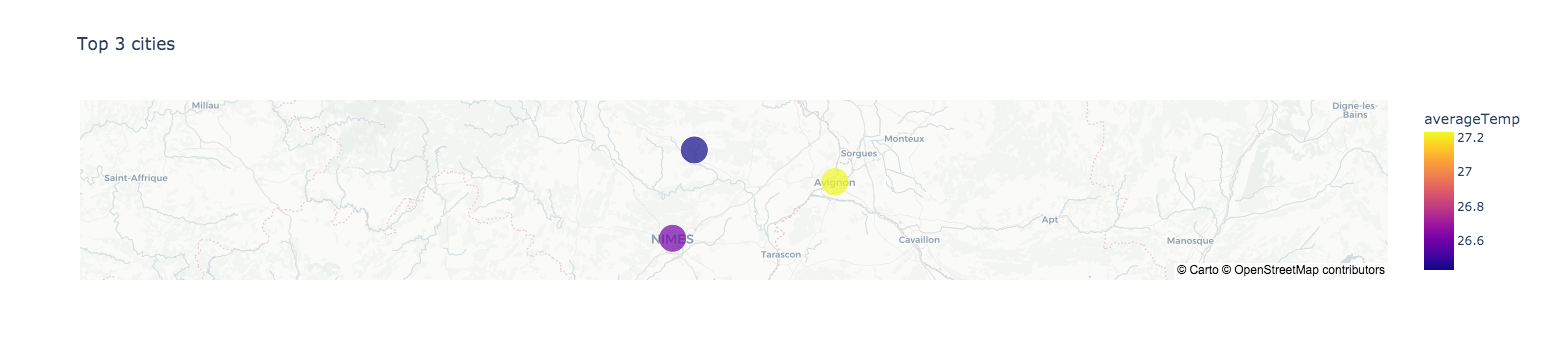

In [13]:
#Creating the map
fig2 = px.scatter_mapbox(exportDfVilles_averagetemp, 
                        lat = "Latitude_Ville",
                        lon = "Longitude_Ville",
                        color = "averageTemp",
                        size = "averageTemp",
                        mapbox_style = "carto-positron",
                        title = 'Top 3 cities')
fig2.show()

In [14]:
df_top_cities_hotels = df_top_cities_hotels[df_top_cities_hotels['cityName'].isin(['Avignon','Uzes','Nimes']) ]
df_top_cities_hotels

,cityid,hotel_id,cityName,hotelName,latitude_hotel,longitude_hotel,URL,score,description
0,22,0,Avignon,Autour Du Petit Paradis,43.946233,4.810070,https://www.booking.com\n/hotel/fr/autour-du-p...,8.3,"Situé au cœur d'Avignon, l'établissement Autou..."
1,22,1,Avignon,Aux Augustins,43.950058,4.813219,https://www.booking.com\n/hotel/fr/aux-augusti...,8.7,"Situé dans le centre historique d'Avignon, l'é..."
2,22,2,Avignon,A l'ombre du Palais,43.951729,4.810339,https://www.booking.com\n/hotel/fr/a-l-39-ombr...,8.4,Situé à 500 mètres du palais des Papes et à 10...
3,22,3,Avignon,Hôtel Le Bristol,43.944032,4.805332,https://www.booking.com\n/hotel/fr/hotel-brist...,8.1,Idéalement situé à l’intérieur des remparts du...
4,22,4,Avignon,hotelF1 Avignon Centre Courtine gare TGV,43.929032,4.788189,https://www.booking.com\n/hotel/fr/hotelf1-avi...,6.8,L'hotelF1 Avignon Centre Courtine gare TGV se ...
...,...,...,...,...,...,...,...,...,...
83,23,83,Uzes,Calme et Charmant Studio à deux pas du centre ...,44.009680,4.416392,https://www.booking.com\n/hotel/fr/calme-et-ch...,9.0,Doté d'une connexion Wi-Fi gratuite et offrant...
85,23,85,Uzes,La Maisonnette romantique,44.010752,4.416645,https://www.booking.com\n/hotel/fr/la-maisonne...,8.3,"Situé à Uzès, dans le Languedoc-Roussillon, l'..."
86,23,86,Uzes,Les toîts d'Uzès,44.013200,4.418068,https://www.booking.com\n/hotel/fr/les-toits-d...,8.5,"Offrant une vue sur la ville, l'établissement ..."
88,23,88,Uzes,les bignones,44.014346,4.422688,https://www.booking.com\n/hotel/fr/les-bignone...,8.9,"Dotée d'une connexion Wi-Fi gratuite, la maiso..."


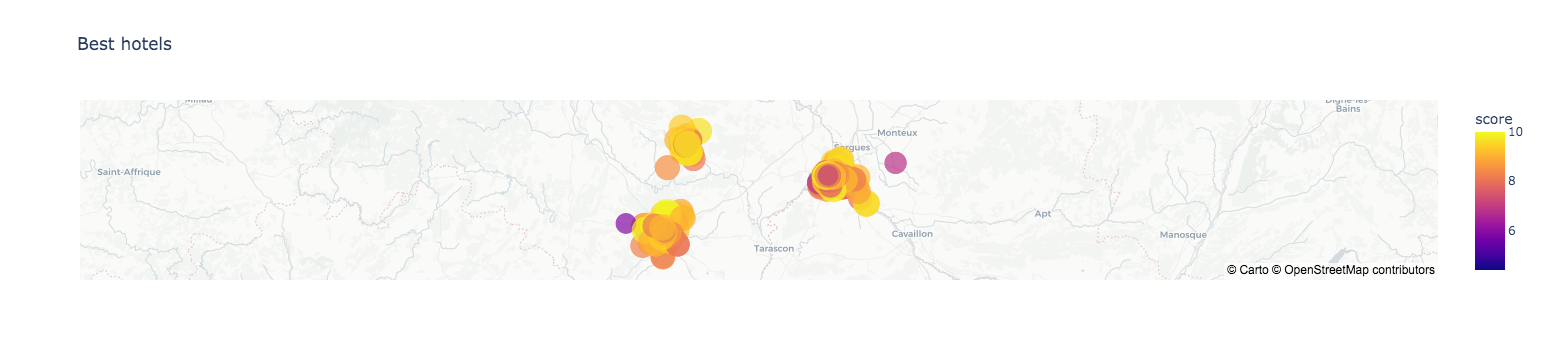

In [15]:
#Creating the map
fig2 = px.scatter_mapbox(df_top_cities_hotels, 
                        lat = "latitude_hotel",
                        lon = "longitude_hotel",
                        color = "score",
                        size = "score",
                        mapbox_style = "carto-positron",
                        title = 'Best hotels')
fig2.show()

In [ ]:
#Creating a new dataset with latitude and longitude infos for the 10 best cities
df_top_cities = dataset.drop(["day_month", "weather_desc", "prob_precipitation", "daily_temperature"], axis=1)

df_top_cities = df_top_cities.drop_duplicates()

df_top_cities = df_top_cities.loc[df_top_cities["city_name"]\
                                .isin(top_cities_name)]\
                                .reset_index()\
                                .drop("index", axis = 1)
df_top_cities